# CO2 Capacity Analysis

### Load and Explore Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# file_path = '/mnt/data/1-s2.0-S2213343723014719-mmc3 (2).xlsx'
data = pd.read_excel('1-s2.0-S2213343723014719-mmc3.xlsx')

# Display the first few rows
data.head()


C:\Users\HP\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Category,Category ID,Adsorbent_Name,Adsorbent ID,Chemical Formula,MOF Code,Symmetry,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar],CO2 Adsorption Capacity [mmol/g],CO2/N2 IAST Selectivity,Regenerability [% Capacity/Ads.]
0,MOF,1,"[tris(Dimethylammonium) octakis(μ6-benzene-1,3...",262,"(C2 H8 N1 1+)3n,n(C72 H24 Cl3 Cu12 O48 3-),9n(...",ABEMIF,Pm-3m,1.85,3640.89,6.80,0.64,1,25,0.15,0.727365,14.92,0.8929
1,MOF,1,(bis(Tetrapropylammonium) hexakis(μ5-isomaleon...,263,"(C12 H28 N1 1+)2n,n(C28 H6 Cu10 N14 S12 2-),0....",ABINEF,C2/c,1.27,10127.90,4.62,0.55,1,25,0.15,0.672152,19.83,0.8763
2,MOF,1,"(bis((μ3-Imidazole-5,6-dicarboxylato)-(4,4'-bi...",264,"(C40 H28 Co3 N10 O8)n,7n(H2 O1)",ABIYIV,Pccn,1.44,4703.28,3.88,0.56,1,25,0.15,1.041453,24.10,0.8837
3,MOF,1,"[bis(μ4-Glutarato)-(μ3-1,3-bis(4-pyridyl)propa...",265,"(C23 H26 Cu2 N2 O8)n,n(C3 H6 O1)",ACAJOF,Pccn,1.28,3191.38,6.10,0.51,1,25,0.15,0.391099,11.63,0.9014
4,MOF,1,"((μ2-Cyclohexane-1,4-dicarboxylato)-bis(μ2-4,4...",266,"(C28 H26 Ag2 N4 O4)n,14n(H2 O1)",ACATAB,P21/c,2.82,3885.79,6.02,0.55,1,25,0.15,0.275758,8.91,0.8954


### Remove Unnecessary Columns

In [2]:

# Remove specified columns
columns_to_remove = ['Category', 'Category ID', 'Adsorbent_Name', 'Adsorbent ID',
                     'Chemical Formula', 'MOF Code', 'Symmetry', 
                     'CO2/N2 IAST Selectivity', 'Regenerability [% Capacity/Ads.]']
data_cleaned = data.drop(columns=columns_to_remove)

# Set the target variable
target_column = 'CO2 Adsorption Capacity [mmol/g]'
y = data_cleaned[target_column]
X = data_cleaned.drop(columns=[target_column])

# Display the cleaned dataset
X.head()


,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],Pressure [bar],Temperature [°C],CO2 Partial Pressure [bar]
0,1.85,3640.89,6.80,0.64,1,25,0.15
1,1.27,10127.90,4.62,0.55,1,25,0.15
2,1.44,4703.28,3.88,0.56,1,25,0.15
3,1.28,3191.38,6.10,0.51,1,25,0.15
4,2.82,3885.79,6.02,0.55,1,25,0.15


### Data Inspection and Cleaning

In [3]:

# Check for missing values
X.isnull().sum()

# Check for constant columns and remove them
constant_columns = ['Pressure [bar]', 'Temperature [°C]']
X = X.drop(columns=constant_columns)

# Convert columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check the statistical summary
X.describe()


,Cell Density [g/cm^3],Cell Volume [],Pore Diameter [Å],Porosity [-],CO2 Partial Pressure [bar]
count,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,1.303111,9052.240689,5.757775,0.573650,0.212728
std,0.477432,16192.506273,2.410915,0.106822,2.228052
min,0.160000,369.680000,3.750000,0.320000,0.000000
25%,1.030000,2683.670000,4.240000,0.490000,0.000000
50%,1.270000,4724.840000,4.980000,0.560000,0.000000
75%,1.510000,9407.037500,6.452500,0.640000,0.000000
max,8.020000,371231.440000,31.000000,0.910000,45.000000


### Visualization of Features

C:\Users\HP\AppData\Local\Temp\ipykernel_17508\3816287639.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


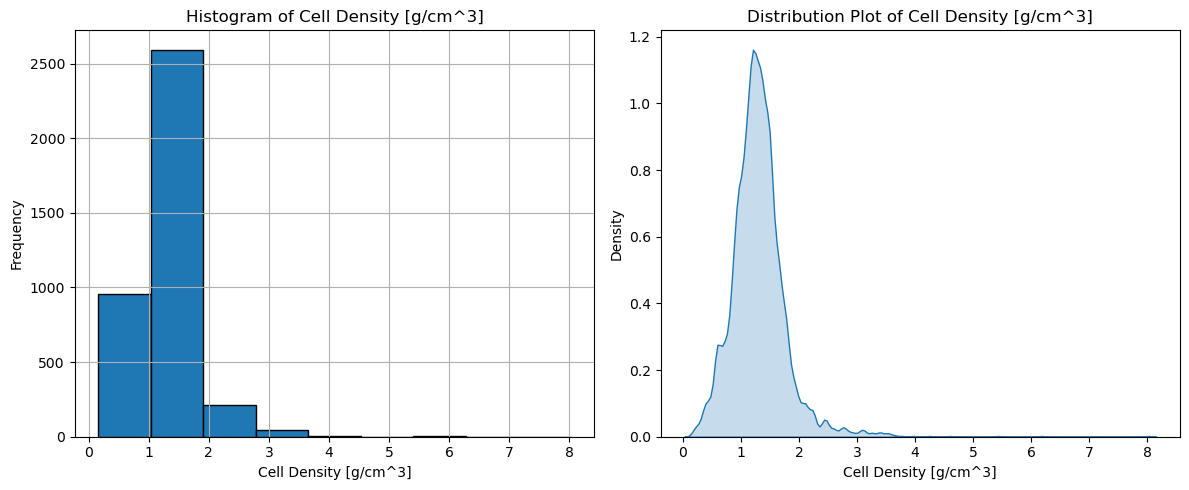

C:\Users\HP\AppData\Local\Temp\ipykernel_17508\3816287639.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


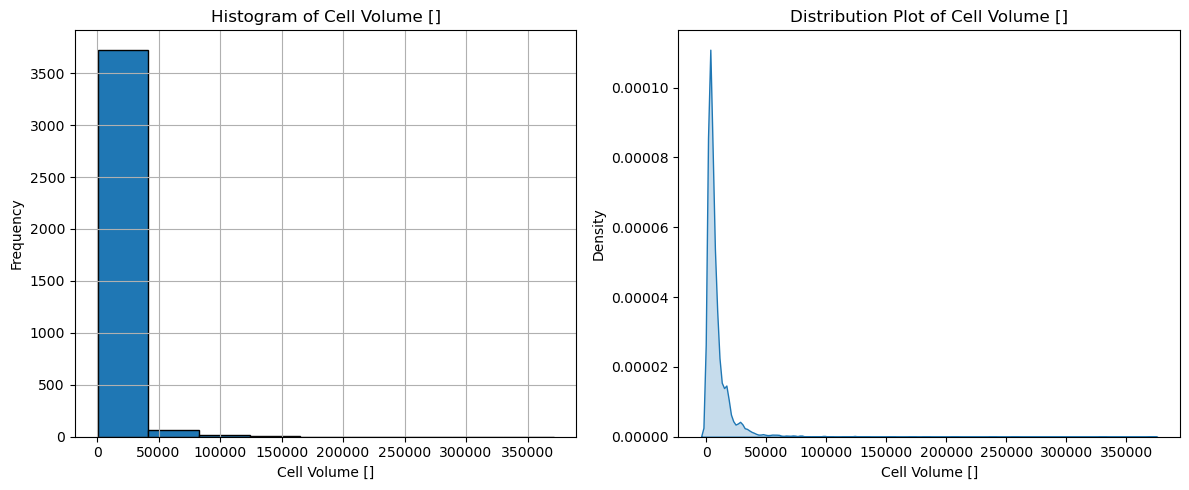

C:\Users\HP\AppData\Local\Temp\ipykernel_17508\3816287639.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


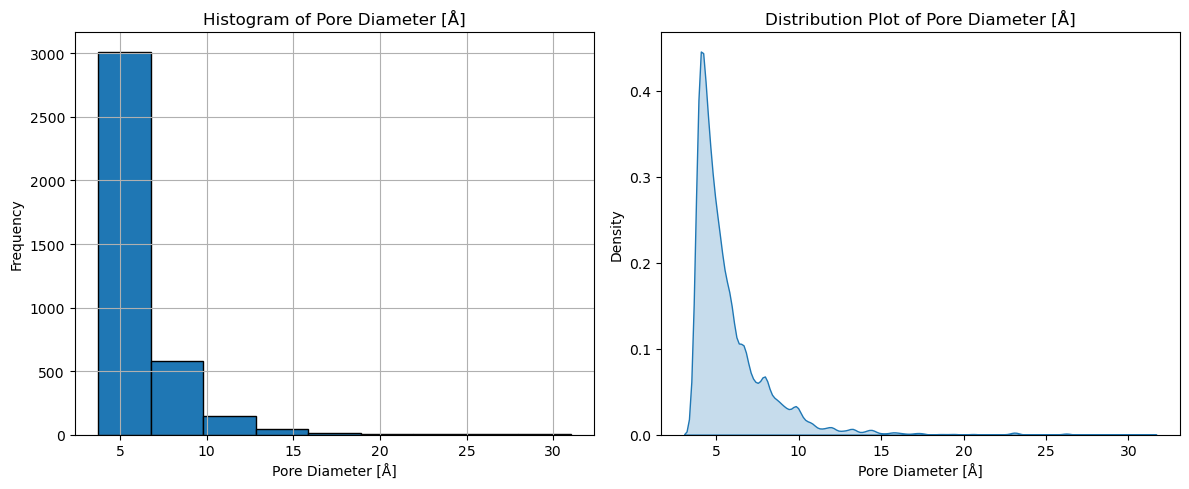

C:\Users\HP\AppData\Local\Temp\ipykernel_17508\3816287639.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


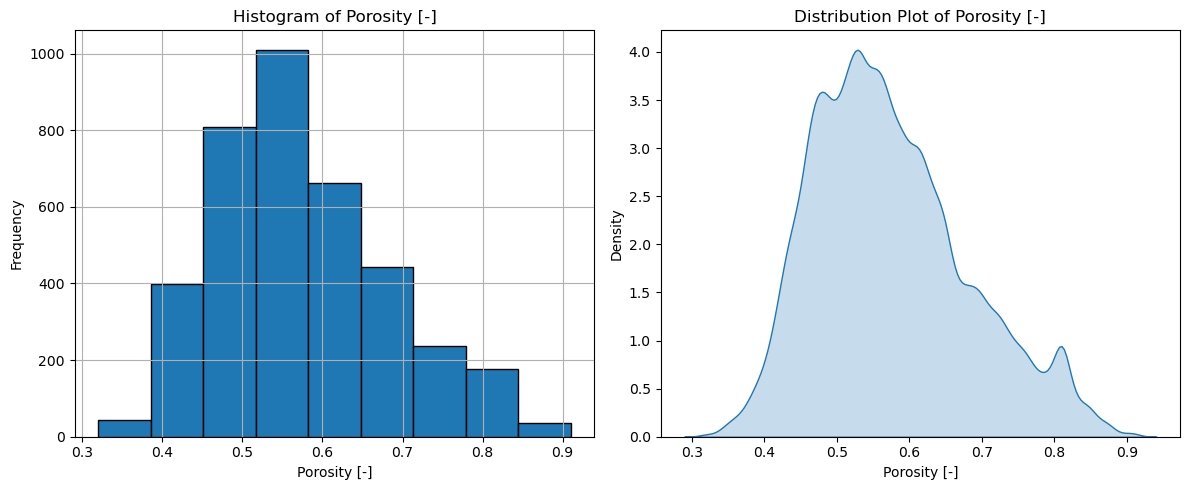

C:\Users\HP\AppData\Local\Temp\ipykernel_17508\3816287639.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X[column], shade=True, bw_adjust=0.5)


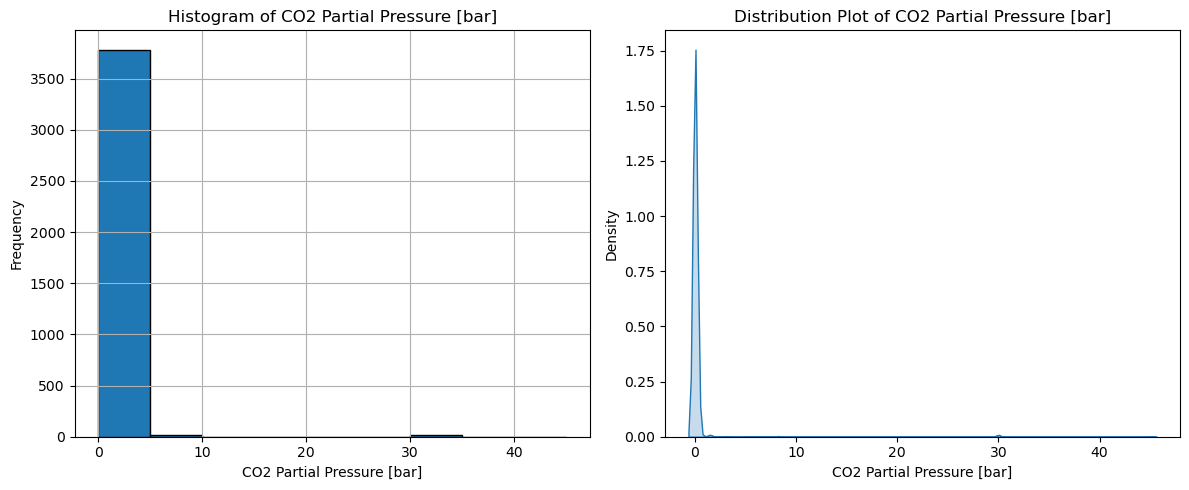

In [9]:
# Generate histograms and distribution plots with dynamic bins
for column in X.columns:
    plt.figure(figsize=(12, 5))
    
    # Calculate bin edges dynamically
    column_min = X[column].min()
    column_max = X[column].max()
    bins = int((column_max - column_min) / ((column_max - column_min) / 9))  # Divide into ~8-10 bins
    
    # Histogram
    plt.subplot(1, 2, 1)
    X[column].hist(bins=bins, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(X[column], shade=True, bw_adjust=0.5)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


### Correlation Matrices

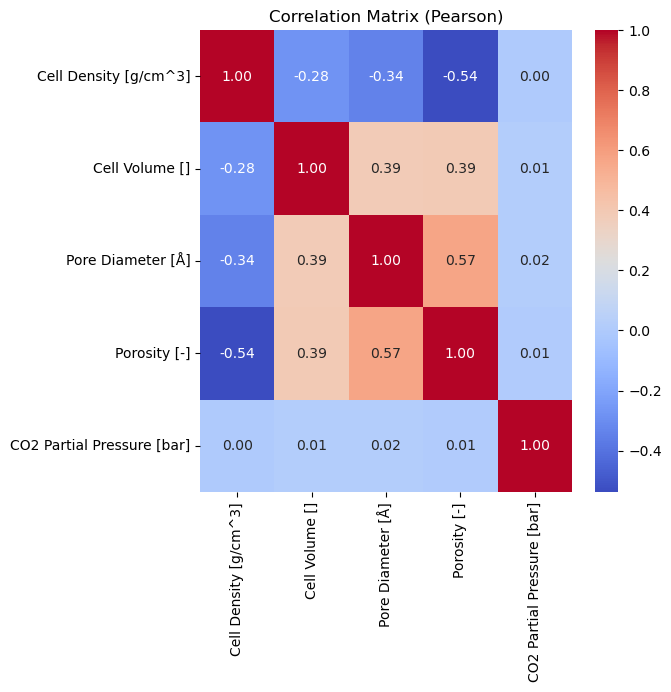

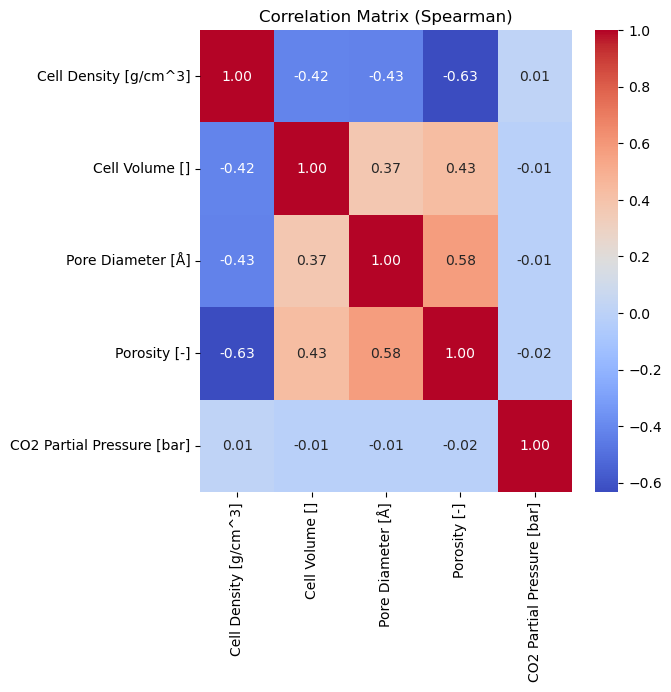

In [7]:

# Compute correlation matrices
correlation_matrix_pearson = X.corr(method='pearson')
correlation_matrix_spearman = X.corr(method='spearman')

# Pearson correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Pearson)')
plt.show()

# Spearman correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Spearman)')
plt.show()
